<a href="https://colab.research.google.com/github/andre2564/SistemaPredictivoAtaquesCardiacos/blob/main/ImplementacionModelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Taller 3 - Implementacion Modelo**

En este trabajo se busca implementar un modelo para un proyecto de analítica de datos.


# Sistemas de prediccion de Ataques Cardiacos 


**Datos de la presentación**


* **Curso**: 901T

* **Autores**:

1. Andrea Roa Perez

# Fase 1: Importancia de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Librerias a utilizar
import numpy                as np
import pandas               as pd
import matplotlib.pyplot    as plt
import seaborn              as sns


import folium               #needed for interactive map
from folium.plugins import HeatMap

import sklearn

from sklearn.model_selection import train_test_split

#Para clasificadores
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Para predictores
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

#Para evaluar modelos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#limites columnas
pd.options.display.max_columns = None

#limites filas
#pd.options.display.max_rows = None

In [ ]:
#importacion dataframe

df=pd.read_csv("/content/drive/MyDrive/data/resultadosMuestra.csv") 
#df=pd.read_csv("/content/drive/MyDrive/data/.csv") 

df

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Fase 2: Implementación de Modelos


In [ ]:
#asignacion de las variables para modelado
y=df['DiagAtaqCorazon']
x=df.drop('DiagAtaqCorazon',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5)

print('Train: ', y_train.shape[0])
print('Val: ', y_val.shape[0])
print('Test: ', y_test.shape[0])

x_train.to_csv("/content/drive/MyDrive/data/train.csv", 
                index=False)

x_val.to_csv("/content/drive/MyDrive/data/val.csv", 
                index=False)

x_test.to_csv("/content/drive/MyDrive/data/test.csv", 
                index=False)

Train:  16690
Val:  3577
Test:  3576


In [ ]:
#Regresión logistica
print('Regresión Logistica')
logReg = LogisticRegression()
logReg.fit(x_train, y_train)
y_predict = logReg.predict(x_val)
print('  Exactitud (accuracy): ',logReg.score(x_val,y_val))

Regresión Logistica
  Exactitud (accuracy):  0.935979871400615


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Regresión SVM
print('Clasificador de SVC')
svc = SVC()
svc.fit(x_train, y_train)
y_predict = svc.predict(x_val)
print('  Exactitud (accuracy): ',svc.score(x_val,y_val))

Clasificador de SVC
  Exactitud (accuracy):  0.9343024881185351


In [ ]:
#Clasificador KNeigbors
print('Clasificador de KNN')
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_predict = knn.predict(x_val)
print('  Exactitud (accuracy): ',knn.score(x_val,y_val))

Clasificador de KNN
  Exactitud (accuracy):  0.9337433603578418


In [ ]:
#Comparación modelos
num_folds = 10 #num particiones
scoring = "accuracy"


models = []
models.append(('Log Reg',LogisticRegression()))
models.append(('SVC Reg',SVC()))
models.append(('KNN Reg',KNeighborsClassifier()))

results = []
names = []

print('Resultados')
kfold = KFold(n_splits=num_folds)
for name, model in models:
  cv_results=cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Resultados


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Log Reg: 0.946794 (0.006767)
SVC Reg: 0.942960 (0.005384)
KNN Reg: 0.943379 (0.007176)


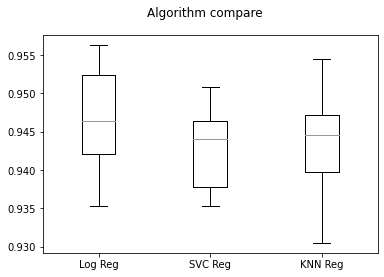

In [ ]:
#Grafica
fig=plt.figure()
fig.suptitle('Algorithm compare')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Fase 2: Entrenamiento de Modelos

In [ ]:
#Modelo de Regresión logistica
modelLogReg = LogisticRegression(penalty='none', random_state=0, max_iter=10000) 

modelLogReg.fit(x_train, y_train)

print('\n----------------------------------------------')
print('Resultados sobre los datos: Regresión Logistica')
print('----------------------------------------------')
print('Accuracy', modelLogReg.score(x_train,y_train))


y_predicho = modelLogReg.predict(x_train)
y_train = y_train.reset_index(drop=True)
fallos = 0
exactos = 0
for i in range(len(y_predicho)):
  obtenido = y_predicho[i]
  esperado = y_train[i]
  if esperado != obtenido:
    fallos += 1
  else:
    exactos +=1
print('Acc: ',exactos / len(y_predicho))  

print('\n----------------------------------------------')
print('Resultados sobre los datos de validación: Regresión Logistica')
print('----------------------------------------------')
print('Accuracy', modelLogReg.score(x_val,y_val))


y_predicho = modelLogReg.predict(x_val)
y_val = y_val.reset_index(drop=True)
fallos = 0
exactos = 0
for i in range(len(y_predicho)):
  obtenido = y_predicho[i]
  esperado = y_val[i]
  if esperado != obtenido:
    fallos += 1
  else:
    exactos +=1
print('Acc: ',exactos / len(y_predicho))


----------------------------------------------
Resultados sobre los datos: Regresión Logistica
----------------------------------------------
Accuracy 0.9469143199520671
Acc:  0.9469143199520671

----------------------------------------------
Resultados sobre los datos de validación: Regresión Logistica
----------------------------------------------
Accuracy 0.9357003075202683
Acc:  0.9357003075202683


In [ ]:
#modelo SVC
modelSVCReg = SVC()

modelSVCReg.fit(x_train, y_train)

print('\n----------------------------------------------')
print('Resultados sobre los datos: Regresión SCV')
print('----------------------------------------------')
print('Accuracy', modelSVCReg.score(x_train,y_train))


y_predicho = modelSVCReg.predict(x_train)
y_train = y_train.reset_index(drop=True)
fallos = 0
exactos = 0
for i in range(len(y_predicho)):
  obtenido = y_predicho[i]
  esperado = y_train[i]
  if esperado != obtenido:
    fallos += 1
  else:
    exactos +=1
print('Acc: ',exactos / len(y_predicho))  

print('\n----------------------------------------------')
print('Resultados sobre los datos de validación: Regresión SCV')
print('----------------------------------------------')
print('Accuracy', modelSVCReg.score(x_val,y_val))


y_predicho = modelSVCReg.predict(x_val)
y_val = y_val.reset_index(drop=True)
fallos = 0
exactos = 0
for i in range(len(y_predicho)):
  obtenido = y_predicho[i]
  esperado = y_val[i]
  if esperado != obtenido:
    fallos += 1
  else:
    exactos +=1
print('Acc: ',exactos / len(y_predicho))


----------------------------------------------
Resultados sobre los datos: Regresión SCV
----------------------------------------------
Accuracy 0.9429598562013182
Acc:  0.9429598562013182

----------------------------------------------
Resultados sobre los datos de validación: Regresión SCV
----------------------------------------------
Accuracy 0.9343024881185351
Acc:  0.9343024881185351


In [ ]:
#modelo KNN
modelKNNReg = KNeighborsClassifier(n_neighbors = 2) 

modelKNNReg.fit(x_train, y_train)

print('\n----------------------------------------------')
print('Resultados sobre los datos: Regresión KNN')
print('----------------------------------------------')
print('Accuracy', modelKNNReg.score(x_train,y_train))


y_predicho = modelKNNReg.predict(x_train)
y_train = y_train.reset_index(drop=True)
fallos = 0
exactos = 0
for i in range(len(y_predicho)):
  obtenido = y_predicho[i]
  esperado = y_train[i]
  if esperado != obtenido:
    fallos += 1
  else:
    exactos +=1
print('Acc: ',exactos / len(y_predicho))  

print('\n----------------------------------------------')
print('Resultados sobre los datos de validación: Regresión KNN')
print('----------------------------------------------')
print('Accuracy', modelKNNReg.score(x_val,y_val))


y_predicho = modelKNNReg.predict(x_val)
y_val = y_val.reset_index(drop=True)
fallos = 0
exactos = 0
for i in range(len(y_predicho)):
  obtenido = y_predicho[i]
  esperado = y_val[i]
  if esperado != obtenido:
    fallos += 1
  else:
    exactos +=1
print('Acc: ',exactos / len(y_predicho))


----------------------------------------------
Resultados sobre los datos: Regresión KNN
----------------------------------------------
Accuracy 0.9566806470940683
Acc:  0.9566806470940683

----------------------------------------------
Resultados sobre los datos de validación: Regresión KNN
----------------------------------------------
Accuracy 0.9320659770757618
Acc:  0.9320659770757618


# Fase 3: Resultados de los modelos

In [ ]:
print('\n----------------------------------------------')
print('Resultados sobre los datos de prueba: Regresión Logistica')
print('----------------------------------------------')
print('Accuracy', modelLogReg.score(x_test,y_test))


y_predicho = modelLogReg.predict(x_test)
y_test = y_test.reset_index(drop=True)
fallos = 0
exactos = 0
for i in range(len(y_predicho)):
  obtenido = y_predicho[i]
  esperado = y_test[i]
  if esperado != obtenido:
    fallos += 1
  else:
    exactos +=1
print('Acc: ',exactos / len(y_predicho))


----------------------------------------------
Resultados sobre los datos de prueba: Regresión Logistica
----------------------------------------------
Accuracy 0.9463087248322147
Acc:  0.9463087248322147


In [ ]:
print('\n----------------------------------------------')
print('Resultados sobre los datos de prueba: Regresión SVC')
print('----------------------------------------------')
print('Accuracy', modelSVCReg.score(x_test,y_test))


y_predicho = modelSVCReg.predict(x_test)
y_test = y_test.reset_index(drop=True)
fallos = 0
exactos = 0
for i in range(len(y_predicho)):
  obtenido = y_predicho[i]
  esperado = y_test[i]
  if esperado != obtenido:
    fallos += 1
  else:
    exactos +=1
print('Acc: ',exactos / len(y_predicho))


----------------------------------------------
Resultados sobre los datos de prueba: Regresión SVC
----------------------------------------------
Accuracy 0.9423937360178971
Acc:  0.9423937360178971


In [ ]:
print('\n----------------------------------------------')
print('Resultados sobre los datos de prueba Regresión KNN')
print('----------------------------------------------')
print('Accuracy', modelKNNReg.score(x_test,y_test))


y_predicho = modelKNNReg.predict(x_test)
y_test = y_test.reset_index(drop=True)
fallos = 0
exactos = 0
for i in range(len(y_predicho)):
  obtenido = y_predicho[i]
  esperado = y_test[i]
  if esperado != obtenido:
    fallos += 1
  else:
    exactos +=1
print('Acc: ',exactos / len(y_predicho))


----------------------------------------------
Resultados sobre los datos de prueba Regresión KNN
----------------------------------------------
Accuracy 0.9437919463087249
Acc:  0.9437919463087249
